In [1]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("HW2-data/IE582_Fall21_HW2_q1_data.csv")
df.head()

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a


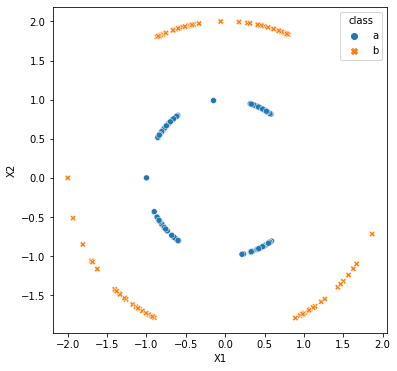

In [3]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="X1",y="X2", hue="class", style="class", data=df);

### a) Apply PCA and Visualize

In [4]:
df_class = df["class"].copy()
df_numeric = df.select_dtypes(["int64","float64"])

pca = PCA(1)
df_pca = pd.DataFrame(pca.fit_transform(df_numeric), columns=["pc1"])
df_pca.head()

,pc1
0,0.722069
1,0.811347
2,-1.008801
3,0.509578
4,-0.692037


In [5]:
df_pca["class"] = df_class
df_pca["observation_no"] = df_pca.index

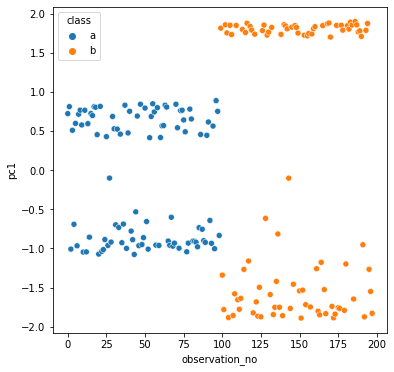

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = "observation_no", y = "pc1", hue="class", data=df_pca);

### b) Apply MDS and Visualize (at least two different similarity measures)

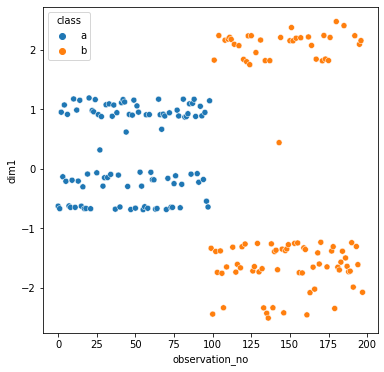

In [7]:
# Euclidean Distance
mds = MDS(n_components = 1, n_jobs=-1, dissimilarity="euclidean")
df_mds = pd.DataFrame(mds.fit_transform(df_numeric), columns=["dim1"])

df_mds["class"] = df_class
df_mds["observation_no"] = df_mds.index
plt.figure(figsize=(6,6))
sns.scatterplot(x= "observation_no", y= "dim1", hue="class", data=df_mds);

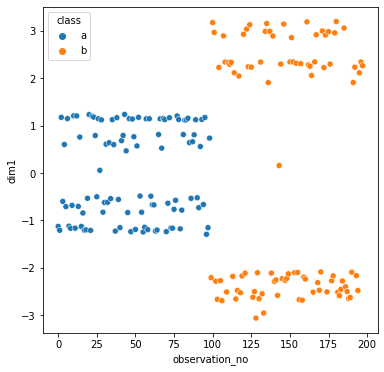

In [8]:
# Manhattan Distance
d_matrix = distance_matrix(df_numeric, df_numeric, p=1) # Create a distance matrix using manhattan distance

mds_2 = MDS(n_components = 1, n_jobs=-1, dissimilarity="precomputed")
df_mds_2 = pd.DataFrame(mds_2.fit_transform(d_matrix), columns=["dim1"])

df_mds_2["class"] = df_class
df_mds_2["observation_no"] = df_mds_2.index
plt.figure(figsize=(6,6))
sns.scatterplot(x= "observation_no", y= "dim1", hue="class", data=df_mds_2);

### c)

##### 1. When PCA is used, observations in the new dimension look like they are projected to the y axis on the original space. That makes sense, because by a quick observation, it looks like the highest variance is around that axis.

##### 2. MDS gives a somewhat similar result, however the classes are now more distinct. This is because MDS takes the distances between the observations into account and it is obvious that observations that have the same classes are closer to each other than the other class observations. (There are different clusters of observations within the same class as well)

##### 3. MDS and PCA gives similar results (actually PCA is like a more basic version of the MDS) but MDS is better at preserving the clusters (due to the taking the distance into account).

### d)

In [12]:
df_copy = df.copy()
df_copy["X1sq"] = df["X1"]*df["X1"]
df_copy["X2sq"] = df["X2"]*df["X2"]
df_copy["X1timesX2"] = df["X1"]*df["X2"]

df_copy.head()

,X1,X2,class,X1sq,X2sq,X1timesX2
0,0.569483,0.822003,a,0.324311,0.675689,0.468117
1,0.411469,0.911424,a,0.169307,0.830693,0.375023
2,0.417385,-0.908730,a,0.174210,0.825790,-0.379290
3,-0.791828,0.610745,a,0.626991,0.373009,-0.483604
4,-0.806777,-0.590857,a,0.650889,0.349111,0.476689


In [13]:
df_class = df_copy["class"]
df_copy.drop(["class"],axis=1, inplace=True)

pca2 = PCA(n_components = 5)
df2_pca = pd.DataFrame(pca2.fit_transform(df_copy), columns=["pc1", "pc2", "pc3", "pc4", "pc5"])
df2_pca["class"] = df_class

In [19]:
df_copy.head(1)

,X1,X2,X1sq,X2sq,X1timesX2
0,0.569483,0.822003,0.324311,0.675689,0.468117


In [14]:
# Eigenvalues, they refer to the variance explained on the corresponding component.
pca2.explained_variance_

array([2.49086525, 1.44256642, 1.28808119, 0.54559809, 0.30619998])

In [15]:
# These are the percentages of these variances explained.
pca2.explained_variance_ratio_

array([0.410133  , 0.23752553, 0.21208879, 0.08983536, 0.05041731])

In [16]:
# Eigenvectors, vectors that indicate how much contribution is done to the components by each original feature.
pca2.components_

array([[ 0.07766657,  0.71257596, -0.19184503,  0.66582496, -0.07794878],
       [-0.42317217, -0.07426701,  0.15328013,  0.27219612,  0.84724507],
       [ 0.21930469, -0.6092683 ,  0.27145989,  0.67993125, -0.21142519],
       [-0.73210164,  0.13942364,  0.49110581,  0.0249689 , -0.45031087],
       [ 0.4804434 ,  0.30995661,  0.79045892, -0.14020145,  0.16917239]])

### First component, which is mostly a linear combination of X2 and X2squared, explains 41% of the variance in the data.
### Second component, which is mostly a linear combination of (-X1) and X1*X2, explains 24% of the variance in the data.

# Task 2

In [67]:
turkey_dist = pd.read_excel("HW2-data/ilmesafe.xls", header=2, index_col=1)
df_tr = turkey_dist.copy()
df_tr = df_tr.fillna(0)
plakalar = df_tr.drop(["İL PLAKA NO"], inplace=True, axis=1)
df_tr = np.maximum(df_tr, df_tr.T) # Convert the matrix to a symmetric one by taking the index-wise maximums of the matrix
# and it's transpose.
city_names = df_tr.index
df_tr.head()

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,0.0,335.0,575.0,966.0,603.0,567.0,535.0,1035.0,874.0,903.0,...,621.0,709.0,782.0,1042.0,1069.0,899.0,714.0,246.0,87.0,735.0
ADIYAMAN,335.0,0.0,910.0,648.0,632.0,814.0,870.0,751.0,1209.0,1238.0,...,303.0,471.0,1028.0,758.0,751.0,1152.0,960.0,210.0,248.0,981.0
AFYONKARAHİSAR,575.0,910.0,0.0,1318.0,597.0,300.0,291.0,1243.0,345.0,328.0,...,1196.0,1284.0,515.0,1351.0,1461.0,338.0,447.0,821.0,662.0,375.0
AĞRI,966.0,648.0,1318.0,0.0,738.0,1141.0,1428.0,396.0,1640.0,1569.0,...,369.0,430.0,1175.0,310.0,143.0,1363.0,1106.0,814.0,879.0,1192.0
AMASYA,603.0,632.0,597.0,738.0,0.0,413.0,825.0,695.0,938.0,831.0,...,796.0,982.0,437.0,783.0,881.0,625.0,368.0,644.0,613.0,454.0


In [68]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x=x, y=y, data=data, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='small', color='black', weight='light',
                 
                )
    
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

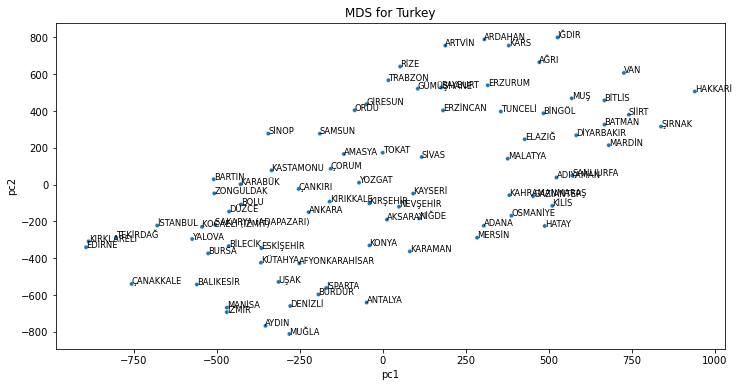

In [69]:
mds = MDS(n_components = 2, n_jobs=-1, dissimilarity="precomputed")
df_tr_mds = pd.DataFrame(mds.fit_transform(df_tr), columns=["h","v"])

df_tr_mds["plaka"] = plakalar
df_tr_mds["city_name"] = city_names
plt.figure(figsize=(12,6))
scatter_text("h","v","city_name",df_tr_mds,"MDS for Turkey","pc1","pc2");

# Task 3

In [70]:
# X Train
gesture_x_train = pd.read_csv("HW2-data/uWaveGestureLibrary_X_TRAIN", header=None, sep=" ",
                             prefix="t", skipinitialspace=True)
gesture_x_train.rename(columns={"t0":"class"}, inplace=True)
gesture_x_train["class"] = gesture_x_train["class"].astype("int").astype("category")
gesture_x_train.head(4)

,class,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t306,t307,t308,t309,t310,t311,t312,t313,t314,t315
0,6,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,...,-0.796414,-0.741728,-0.694698,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669,-0.647669
1,5,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,...,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634,-0.237634
2,5,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,...,-0.282011,-0.236929,-0.191848,-0.146766,-0.101685,-0.061203,-0.056638,-0.055462,-0.055462,-0.055462
3,3,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,...,1.207290,1.147822,1.094344,1.060362,1.053158,1.044467,1.018981,0.909949,0.791013,0.672077


In [71]:
# Y Train
gesture_y_train = pd.read_csv("HW2-data/uWaveGestureLibrary_Y_TRAIN", header=None, sep=" ",
                             prefix="t", skipinitialspace=True)
gesture_y_train.rename(columns={"t0":"class"}, inplace=True)
gesture_y_train["class"] = gesture_y_train["class"].astype("int").astype("category")
gesture_y_train.head(4)

,class,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t306,t307,t308,t309,t310,t311,t312,t313,t314,t315
0,6,-2.119396,-2.119396,-2.119396,-2.119396,-2.119396,-2.119396,-2.119396,-2.119396,-2.119396,...,0.084123,0.084123,0.084123,0.084123,0.084123,0.084123,0.084123,0.084123,0.084123,0.084123
1,5,0.666624,0.666624,0.666624,0.666624,0.666624,0.666624,0.666624,0.666624,0.666624,...,-1.517261,-1.554968,-1.592674,-1.629870,-1.662524,-1.662524,-1.662524,-1.662524,-1.662524,-1.662524
2,5,-0.189730,-0.189730,-0.189730,-0.189730,-0.189730,-0.189730,-0.189730,-0.189730,-0.189730,...,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490,-1.492490
3,3,0.374067,0.374067,0.374067,0.374067,0.374067,0.374067,0.374067,0.374067,0.374067,...,-1.531698,-1.639404,-1.747843,-1.837563,-1.901574,-1.933636,-1.917323,-1.660378,-1.374903,-1.089428


In [72]:
# Z Train
gesture_z_train = pd.read_csv("HW2-data/uWaveGestureLibrary_Z_TRAIN", header=None, sep=" ",
                             prefix="t", skipinitialspace=True)
gesture_z_train.rename(columns={"t0":"class"}, inplace=True)
gesture_z_train["class"] = gesture_z_train["class"].astype("int").astype("category")
gesture_z_train.head(4)

,class,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t306,t307,t308,t309,t310,t311,t312,t313,t314,t315
0,6,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,-1.528965,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,5,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,1.786869,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,5,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,0.521249,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,3,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,0.309455,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573


### a)

### Big yellow dots represent the starting point (t=0).

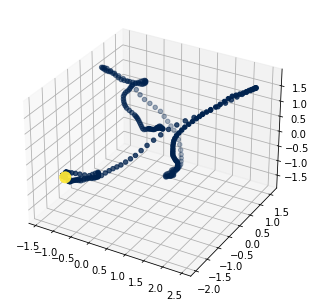

In [133]:
# class 1 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[10]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[10]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[10]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

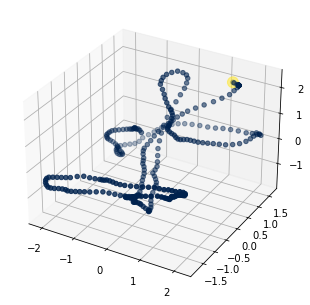

In [132]:
# class 2 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[14]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[14]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[14]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

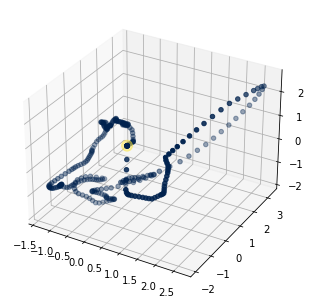

In [131]:
# class 3 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[3]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[3]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[3]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

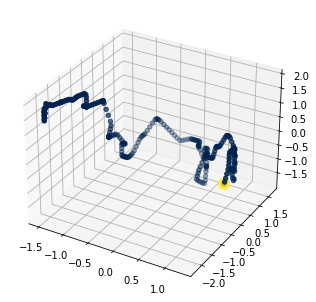

In [130]:
# class 4 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[4]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[4]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[4]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

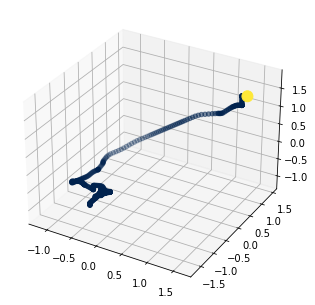

In [129]:
# class 5 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[1]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[1]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[1]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

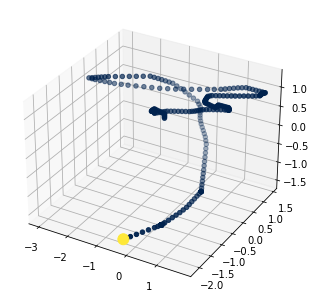

In [126]:
# class 6 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[0]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[0]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[0]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

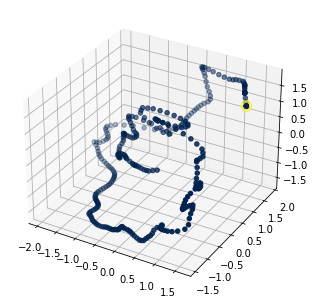

In [127]:
# class 7 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[6]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[6]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[6]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

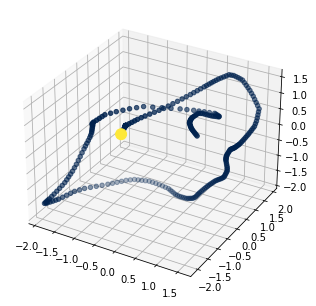

In [128]:
# class 8 visualization

class1_x = gesture_x_train.drop(["class"],axis=1).loc[5]
class1_y = gesture_y_train.drop(["class"],axis=1).loc[5]
class1_z = gesture_z_train.drop(["class"],axis=1).loc[5]

# concatenate axes

class1_concat = pd.concat([class1_x, class1_y, class1_z], axis=1)
class1_concat.columns = ["x","y","z"]
class1_concat["first"] = (class1_concat.index=="t1").astype(int)


# visualize axes

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(class1_concat["x"], class1_concat["y"], class1_concat["z"], cmap="cividis" , c=class1_concat["first"], s=class1_concat["first"]*100+20);

### b)

In [134]:
# X Train
gesture_x_train_b = pd.read_csv("HW2-data/uWaveGestureLibrary_X_TRAIN", header=None, sep=" ",
                             prefix="xt", skipinitialspace=True)
gesture_x_train_b.rename(columns={"xt0":"class"}, inplace=True)
gesture_x_train_b["class"] = gesture_x_train_b["class"].astype("int").astype("category")

# Y Train
gesture_y_train_b = pd.read_csv("HW2-data/uWaveGestureLibrary_Y_TRAIN", header=None, sep=" ",
                             prefix="yt", skipinitialspace=True)
gesture_y_train_b.rename(columns={"yt0":"class"}, inplace=True)
gesture_y_train_b["class"] = gesture_y_train_b["class"].astype("int").astype("category")
gesture_y_train_b.drop(["class"], axis=1, inplace=True)

# Z Train
gesture_z_train_b = pd.read_csv("HW2-data/uWaveGestureLibrary_Z_TRAIN", header=None, sep=" ",
                             prefix="zt", skipinitialspace=True)
gesture_z_train_b.rename(columns={"zt0":"class"}, inplace=True)
gesture_z_train_b["class"] = gesture_z_train_b["class"].astype("int").astype("category")
gesture_z_train_b.drop(["class"], axis=1, inplace=True)

In [135]:
# concatenate the variables
concat_gesture_b = pd.concat([gesture_x_train_b, gesture_y_train_b, gesture_z_train_b], join="inner", axis=1)
concat_gesture_b.head()

,class,xt1,xt2,xt3,xt4,xt5,xt6,xt7,xt8,xt9,...,zt306,zt307,zt308,zt309,zt310,zt311,zt312,zt313,zt314,zt315
0,6,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,-0.304243,...,0.523217,0.513994,0.503481,0.492967,0.474522,0.456077,0.437632,0.419187,0.400743,0.382298
1,5,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,1.627311,...,-0.427010,-0.427010,-0.427010,-0.427172,-0.428773,-0.440720,-0.452667,-0.464613,-0.476560,-0.488507
2,5,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,0.661277,...,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717,-0.862717
3,3,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,0.005185,...,-0.187384,-0.123549,-0.055870,0.011808,0.079487,0.157056,0.253740,0.445503,0.648538,0.851573
4,4,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,1.286198,...,1.867473,1.834319,1.756000,1.638582,1.521164,1.453266,1.515219,1.632637,1.750054,1.867473


In [141]:
concat_class1 = concat_gesture_b[concat_gesture_b["class"]==1].drop(["class"], axis=1)
concat_class2 = concat_gesture_b[concat_gesture_b["class"]==2].drop(["class"], axis=1)
concat_class3 = concat_gesture_b[concat_gesture_b["class"]==3].drop(["class"], axis=1)
concat_class4 = concat_gesture_b[concat_gesture_b["class"]==4].drop(["class"], axis=1)
concat_class5 = concat_gesture_b[concat_gesture_b["class"]==5].drop(["class"], axis=1)
concat_class6 = concat_gesture_b[concat_gesture_b["class"]==6].drop(["class"], axis=1)
concat_class7 = concat_gesture_b[concat_gesture_b["class"]==7].drop(["class"], axis=1)
concat_class8 = concat_gesture_b[concat_gesture_b["class"]==8].drop(["class"], axis=1)

# Class 1)

In [137]:
rows = concat_class1.columns
concat_class1 = concat_class1.T
pca_class1 = PCA(2)
reduced_class1 = pd.DataFrame(pca_class1.fit_transform(concat_class1), index=rows, columns=["cmp1","cmp2"])
reduced_class1.head()

,cmp1,cmp2
xt1,-3.688900,-5.182182
xt2,-3.687540,-5.163230
xt3,-3.692586,-5.144571
xt4,-3.696911,-5.131040
xt5,-3.697124,-5.124149


# a)

In [138]:
pca_class1.explained_variance_ratio_

array([0.52997902, 0.10401207])

### 63% of the variance is recevored from the first two component.

# b)

In [139]:
pca_class1.components_

array([[ 0.07507587,  0.09655314,  0.09618679,  0.08446882,  0.09670319,
         0.10534574,  0.02368807,  0.09949929,  0.10283933,  0.09290335,
         0.08148887,  0.09854217,  0.11222543,  0.01884564,  0.10881081,
         0.11639327,  0.07459519,  0.10837032,  0.1056844 ,  0.10479638,
         0.11213191,  0.08204737,  0.10135898,  0.08290923,  0.05995765,
         0.10426647,  0.1105353 ,  0.06895512,  0.08186782,  0.11360465,
         0.06093607,  0.08040934,  0.10630218,  0.10451076,  0.10384257,
         0.09954738,  0.10484235,  0.10641376,  0.10544116,  0.09452079,
         0.09761255,  0.10711168,  0.10560594,  0.10974682,  0.11184611,
         0.03061561,  0.09538043,  0.0986152 ,  0.11252532,  0.09189326,
         0.09398317,  0.04215918,  0.11496396,  0.10881193,  0.06881329,
         0.10821975,  0.07871723,  0.0904963 , -0.00567957,  0.09562962,
         0.07523625,  0.0717427 ,  0.10919376,  0.07487384,  0.06404102,
         0.10510432,  0.07216432,  0.0767278 ,  0.0

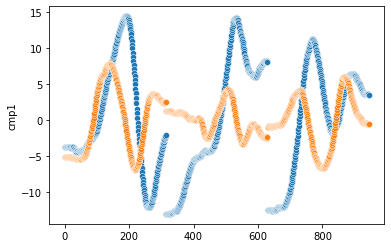

In [31]:
sns.scatterplot(x=range(0, len(reduced_class1["cmp1"])), y= reduced_class1["cmp1"])
sns.scatterplot(x=range(0, len(reduced_class1["cmp2"])), y= reduced_class1["cmp2"]);

In [32]:
# This line is used to create html version of the notebook.

import os

os.system('jupyter nbconvert --to html HW2.ipynb')

0